**Link of the Data set used **

https://catalog.data.gov/dataset/motor-vehicle-collisions-crashes/resource/b5a431d2-4832-43a6-9334-86b62bdb033f

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

#Reading CSV

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes-.csv')

<ipython-input-3-1e56f72e559e>:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes-.csv')


# Basic Information

In [4]:
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())

Dataset Shape: (2141544, 29)
Column Names: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')
Data Types:
 CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object


In [5]:
drop_column = ['Unspecified']

In [6]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


# Descriptive Statistics

In [7]:
print("Descriptive Statistics:\n", df.describe(include='all'))

Descriptive Statistics:
         CRASH DATE CRASH TIME   BOROUGH   ZIP CODE      LATITUDE  \
count      2141544    2141544   1477031  1476769.0  1.902079e+06   
unique        4546       1440         5      427.0           NaN   
top     01/21/2014      16:00  BROOKLYN    11207.0           NaN   
freq          1161      28996    471251    21899.0           NaN   
mean           NaN        NaN       NaN        NaN  4.062277e+01   
std            NaN        NaN       NaN        NaN  2.029404e+00   
min            NaN        NaN       NaN        NaN  0.000000e+00   
25%            NaN        NaN       NaN        NaN  4.066758e+01   
50%            NaN        NaN       NaN        NaN  4.072057e+01   
75%            NaN        NaN       NaN        NaN  4.076962e+01   
max            NaN        NaN       NaN        NaN  4.334444e+01   

           LONGITUDE    LOCATION                    ON STREET NAME  \
count   1.902079e+06     1902079                           1682063   
unique           N

# Handling Missing Values

In [8]:
missing_data = df.isnull().mean() * 100
print("Missing Data (%):\n", missing_data[missing_data > 0])

Missing Data (%):
 BOROUGH                          31.029622
ZIP CODE                         31.041856
LATITUDE                         11.181886
LONGITUDE                        11.181886
LOCATION                         11.181886
ON STREET NAME                   21.455595
CROSS STREET NAME                38.124503
OFF STREET NAME                  82.857789
NUMBER OF PERSONS INJURED         0.000841
NUMBER OF PERSONS KILLED          0.001448
CONTRIBUTING FACTOR VEHICLE 1     0.339241
CONTRIBUTING FACTOR VEHICLE 2    15.741353
CONTRIBUTING FACTOR VEHICLE 3    92.803417
CONTRIBUTING FACTOR VEHICLE 4    98.363517
CONTRIBUTING FACTOR VEHICLE 5    99.553360
VEHICLE TYPE CODE 1               0.690857
VEHICLE TYPE CODE 2              19.546645
VEHICLE TYPE CODE 3              93.073969
VEHICLE TYPE CODE 4              98.422026
VEHICLE TYPE CODE 5              99.567135
dtype: float64


#Time based Analysis

In [9]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
df['Hour'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour


# Yearly Crash Trends

<ipython-input-10-3f8295c2ff9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), palette=palette)


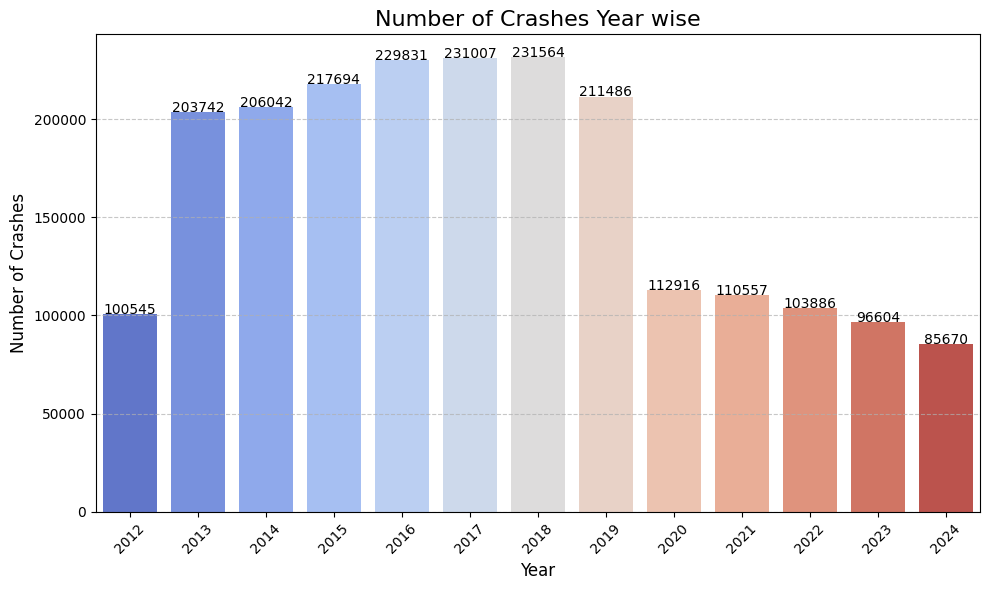

In [10]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", len(df['Year'].unique()))
sns.countplot(data=df, x='Year', order=sorted(df['Year'].unique()), palette=palette)
# Adding annotations
year_counts = df['Year'].value_counts().sort_index()
for i, count in enumerate(year_counts):
    plt.text(i, count + 20, str(count), ha='center', fontsize=10)

plt.title("Number of Crashes Year wise", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Hourly Crash Trends (with KDE curve)

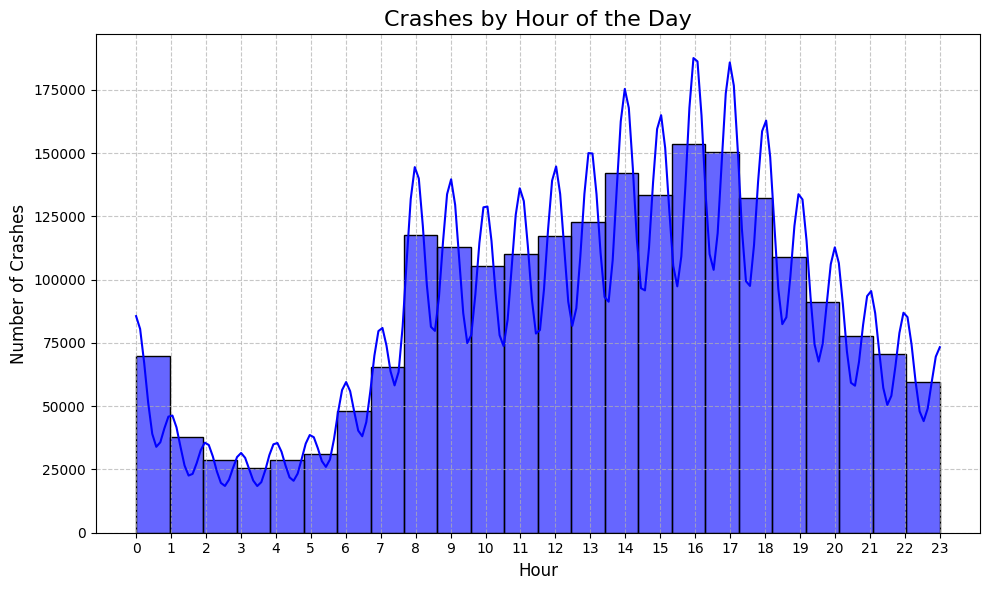

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='b', alpha=0.6)

plt.title("Crashes by Hour of the Day", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Monthly Crash Trends

<ipython-input-12-0f3c46136432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', order=range(1, 13), palette=palette)


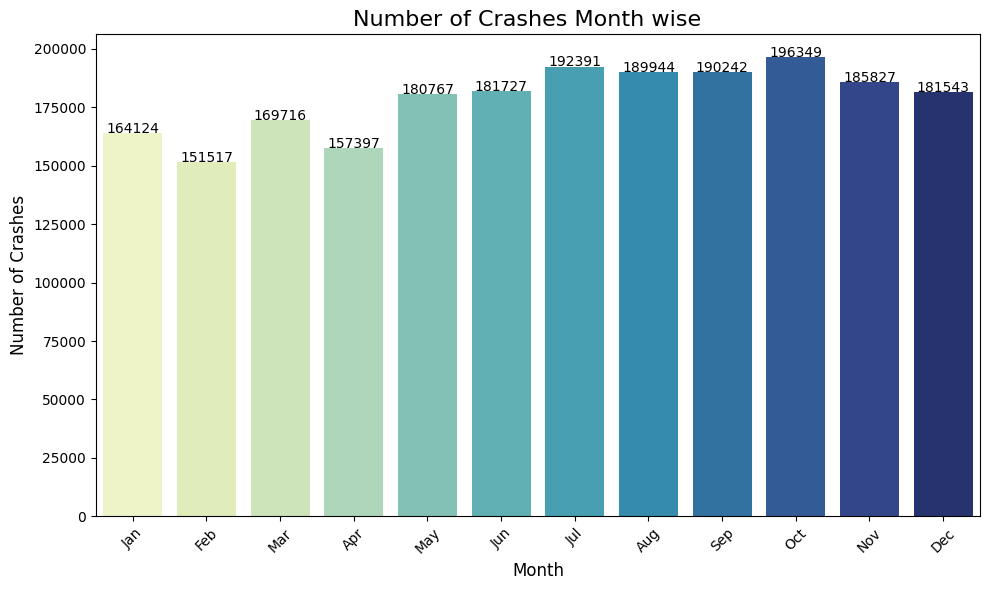

In [12]:
plt.figure(figsize=(10, 6))
palette = sns.color_palette("YlGnBu", 12)
sns.countplot(data=df, x='Month', order=range(1, 13), palette=palette)

# Adding annotations
month_counts = df['Month'].value_counts().sort_index()
for i, count in enumerate(month_counts):
    plt.text(i, count + 20, str(count), ha='center', fontsize=10)

plt.title("Number of Crashes Month wise   ", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

# Contributing Factors

In [13]:
# Contributing Factors
factor_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5',
]


# Concatenate and count contributing factors

In [14]:
contributing_factors = pd.Series(
    np.concatenate([df[col].dropna().values for col in factor_cols])
).value_counts()

# Remove "Unspecified" from the results

In [15]:
contributing_factors = contributing_factors[contributing_factors.index != "Unspecified"]

#Top 10 contributing factors

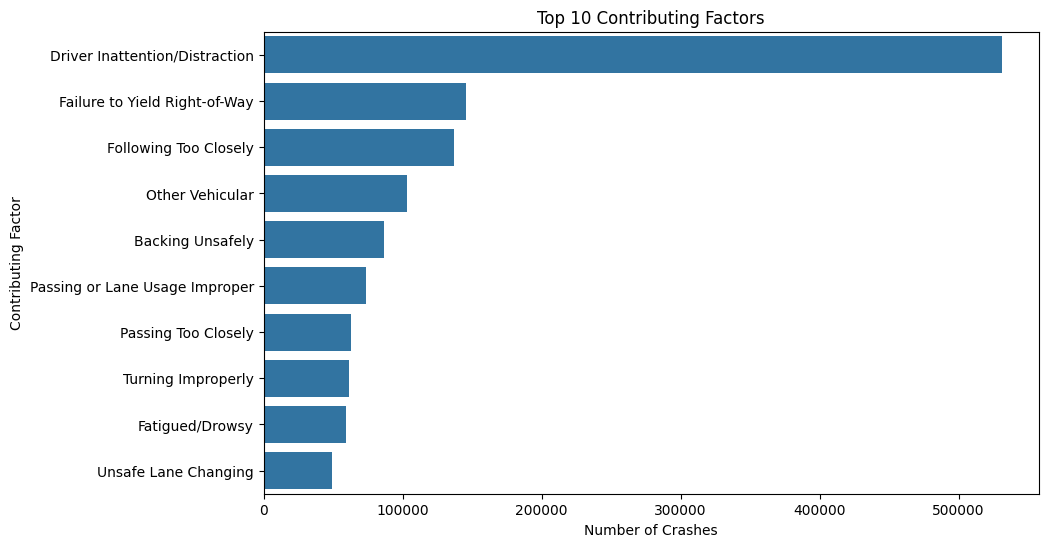

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=contributing_factors.head(10).values, y=contributing_factors.head(10).index)
plt.title("Top 10 Contributing Factors")
plt.xlabel("Number of Crashes")
plt.ylabel("Contributing Factor")
plt.show()

# Vehicle Type Analysis

In [17]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5',
]
vehicle_types = pd.Series(
    np.concatenate([df[col].dropna().values for col in vehicle_cols])
).value_counts()


#  Top 10 vehicle types

<ipython-input-18-3eb64683d1e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.values, y=top_vehicle_types.index, palette=palette)


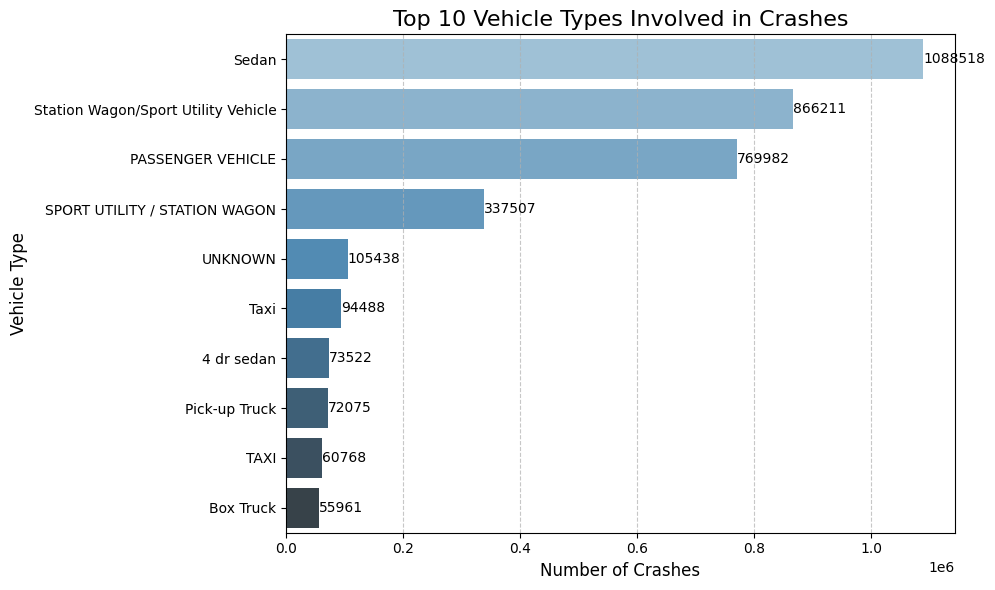

In [18]:
top_vehicle_types = vehicle_types.head(10)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("Blues_d", len(top_vehicle_types))
sns.barplot(x=top_vehicle_types.values, y=top_vehicle_types.index, palette=palette)

# Adding annotations
for i, value in enumerate(top_vehicle_types.values):
    plt.text(value + 2, i, str(value), va='center')

plt.title("Top 10 Vehicle Types Involved in Crashes", fontsize=16)
plt.xlabel("Number of Crashes", fontsize=12)
plt.ylabel("Vehicle Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Plotting heatmap

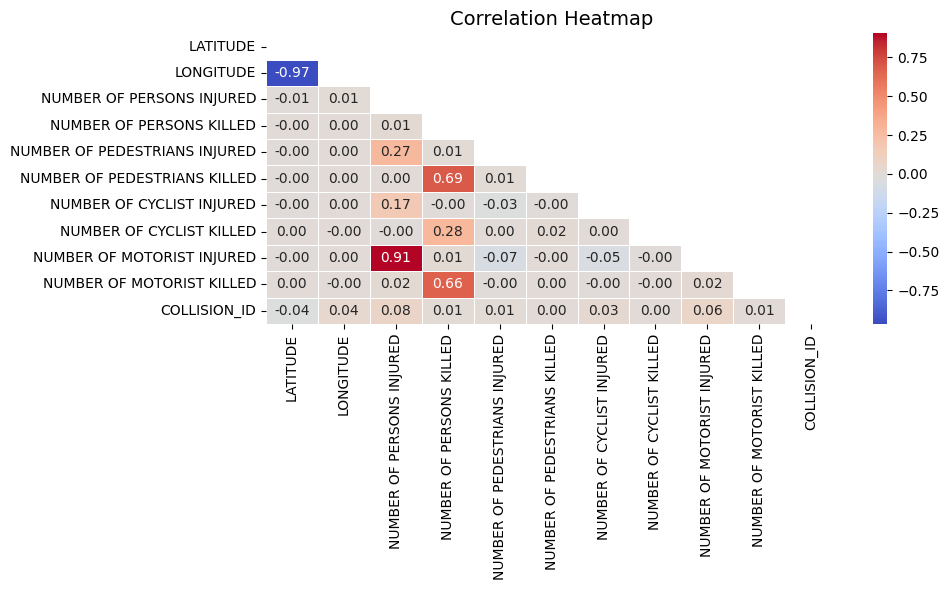

In [19]:
# Heatmap of Correlations
def plot_correlation_heatmap(df, figsize=(10, 6), cmap='coolwarm', title="Correlation Heatmap"):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = df[numeric_cols].corr()

    # Mask the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
plot_correlation_heatmap(df)


# Crash Severity: Persons Injured

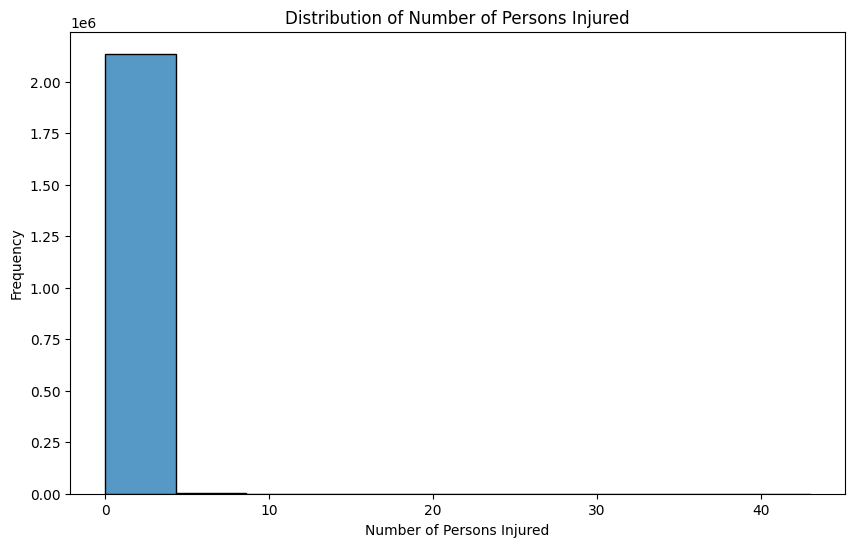

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NUMBER OF PERSONS INJURED'], bins=10, kde=False)
plt.title("Distribution of Number of Persons Injured")
plt.xlabel("Number of Persons Injured")
plt.ylabel("Frequency")
plt.show()



# Crash Severity: Persons Killed

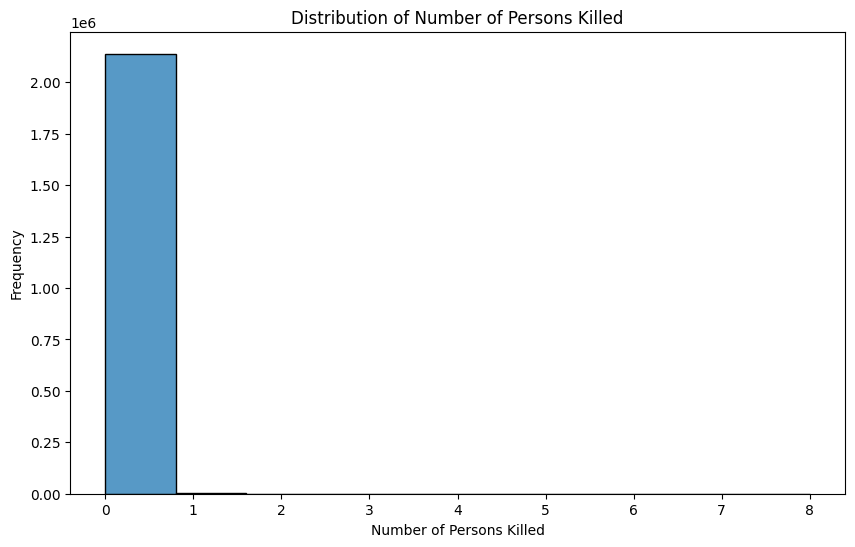

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['NUMBER OF PERSONS KILLED'], bins=10, kde=False)
plt.title("Distribution of Number of Persons Killed")
plt.xlabel("Number of Persons Killed")
plt.ylabel("Frequency")
plt.show()

# Street with most Crashes

<ipython-input-22-49acb6ccb541>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=street_crashes.values, y=street_crashes.index, palette=palette)


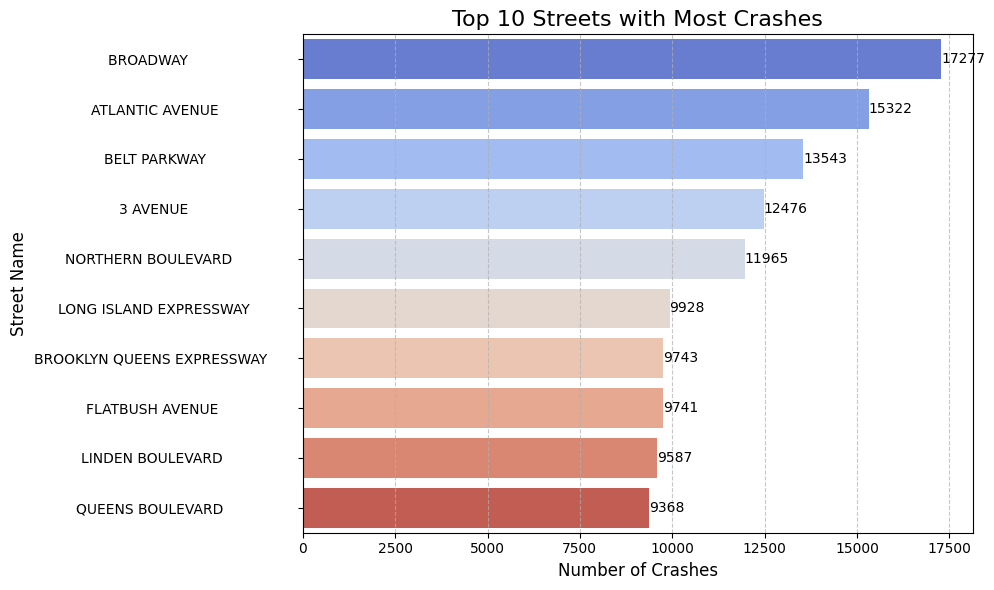

In [22]:
street_crashes = df['ON STREET NAME'].value_counts().head(10)
plt.figure(figsize=(10, 6))
palette = sns.color_palette("coolwarm", len(street_crashes))
sns.barplot(x=street_crashes.values, y=street_crashes.index, palette=palette)

# Adding annotations
for i, value in enumerate(street_crashes.values):
    plt.text(value + 1, i, str(value), va='center')

plt.title("Top 10 Streets with Most Crashes", fontsize=16)
plt.xlabel("Number of Crashes", fontsize=12)
plt.ylabel("Street Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Number of crashes by day of week

<ipython-input-23-f9b450553bbd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crash_counts.index, y=crash_counts.values, palette="viridis")


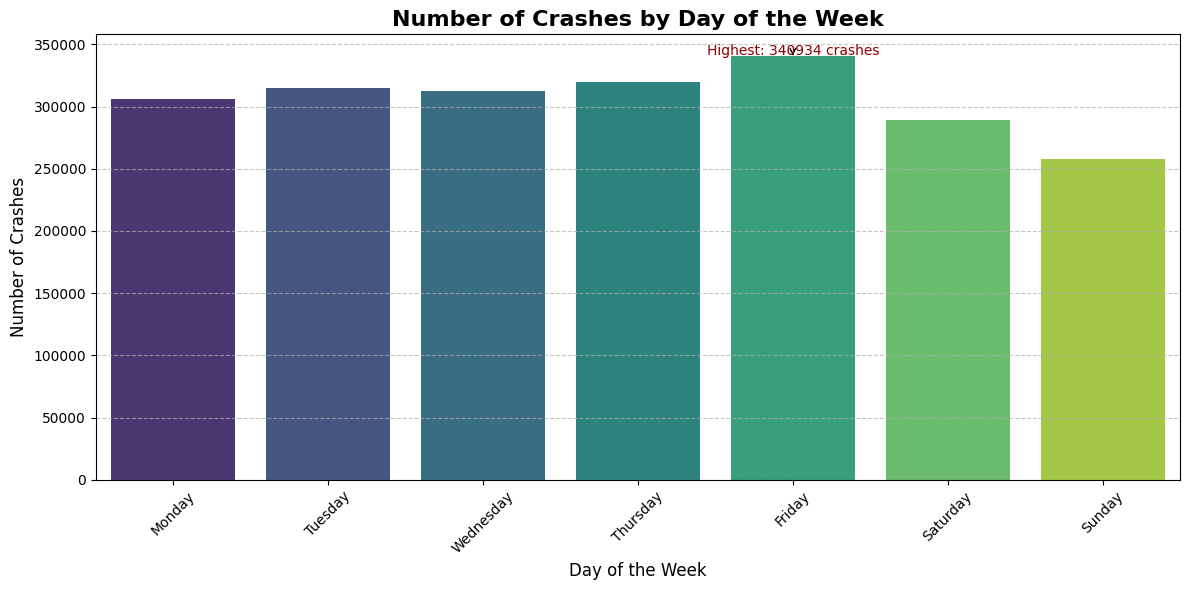

In [23]:
# Ensure 'CRASH DATE' is in datetime format
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')

# Extract day of the week
df['Day of Week'] = df['CRASH DATE'].dt.day_name()

# Calculate crash counts by day of the week
crash_counts = df['Day of Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 6))
sns.barplot(x=crash_counts.index, y=crash_counts.values, palette="viridis")

# Add title and labels
plt.title("Number of Crashes by Day of the Week", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the day with the highest number of crashes
max_day = crash_counts.idxmax()
max_count = crash_counts.max()
plt.annotate(f"Highest: {max_count} crashes",
             xy=(max_day, max_count),
             xytext=(max_day, max_count + 100),
             ha='center',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10,
             color="darkred")

# Show the plot
plt.tight_layout()
plt.show()

#Average number of injuries by Hour

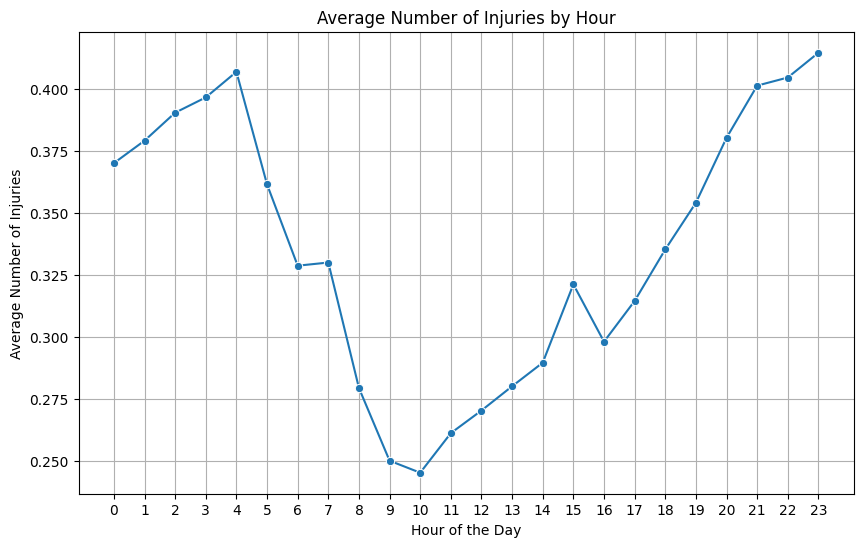

In [24]:
# Convert CRASH TIME to datetime to extract the hour
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')
df['Hour'] = df['CRASH TIME'].dt.hour

# Calculate average injuries by hour
avg_injuries_by_hour = df.groupby('Hour')['NUMBER OF PERSONS INJURED'].mean()

# Plot the average number of injuries by hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_injuries_by_hour.index, y=avg_injuries_by_hour.values, marker="o")
plt.title("Average Number of Injuries by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Number of Injuries")
plt.xticks(range(0, 24))
plt.grid()
plt.show()